# Sliced-Wasserstein Filter Tutorial

In this notebook, we show how to use the Sliced-Wasserstein Filter.

In [1]:
import sys
sys.path.append('../src')

from swfilter import SlicedWassersteinFilter, SmartSplitSlicedWassersteinFilter
import matplotlib.pylab as plt
import numpy as np
import copy
import ot


## Data generation

We start by generating three gaussian distributions.:
- xs is the group of the majority ;
- xt is the group of the minority;
- xv represents statistical outliers.

In [2]:
n = 300  # nb samples
m = 50

mu_s = np.array([-1, -1])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

mu_v = np.array((-2,10))
cov_v = np.array([[1, 0.2], [0.2, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(m, mu_t, cov_t)
xv = ot.datasets.make_2D_samples_gauss(5, mu_v, cov_v)



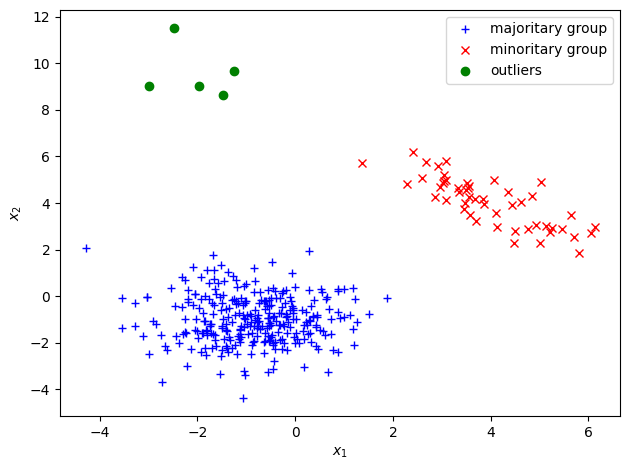

In [3]:
plt.figure(1)
plt.plot(xs[:, 0], xs[:, 1], '+b', label='majoritary group')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='minoritary group')
plt.plot(xv[:, 0], xv[:, 1], 'og', label='outliers')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('2D_tutorial_dist.pdf', dpi=400)
plt.show()
#plt.title('Source and target distributions')

## Aggregate 

We now aggregate the three distributions in a single dataset.

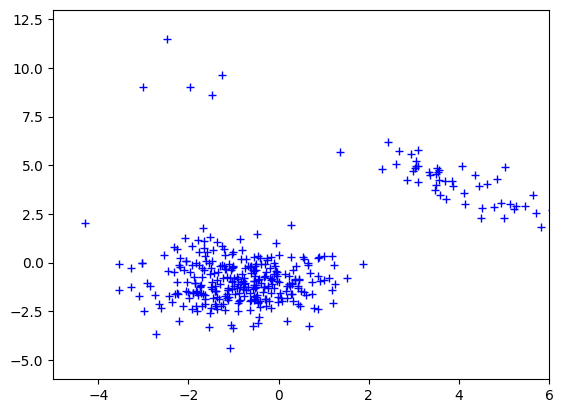

In [4]:
dataset = np.vstack((xs, xt, xv))

plt.figure(2)
plt.plot(dataset[:, 0], dataset[:, 1],'+b', label= 'samples')
plt.xlim((-5,6))
plt.ylim((-6,13))
plt.show()


## Filtering

We pick three different threshold for the Sliced-Wasserstein filter and fix the other hyperparameters.

(355,)
(355,)
(355, 2)
(355,)
(355,)
(355, 2)
(355,)
(355,)
(355, 2)


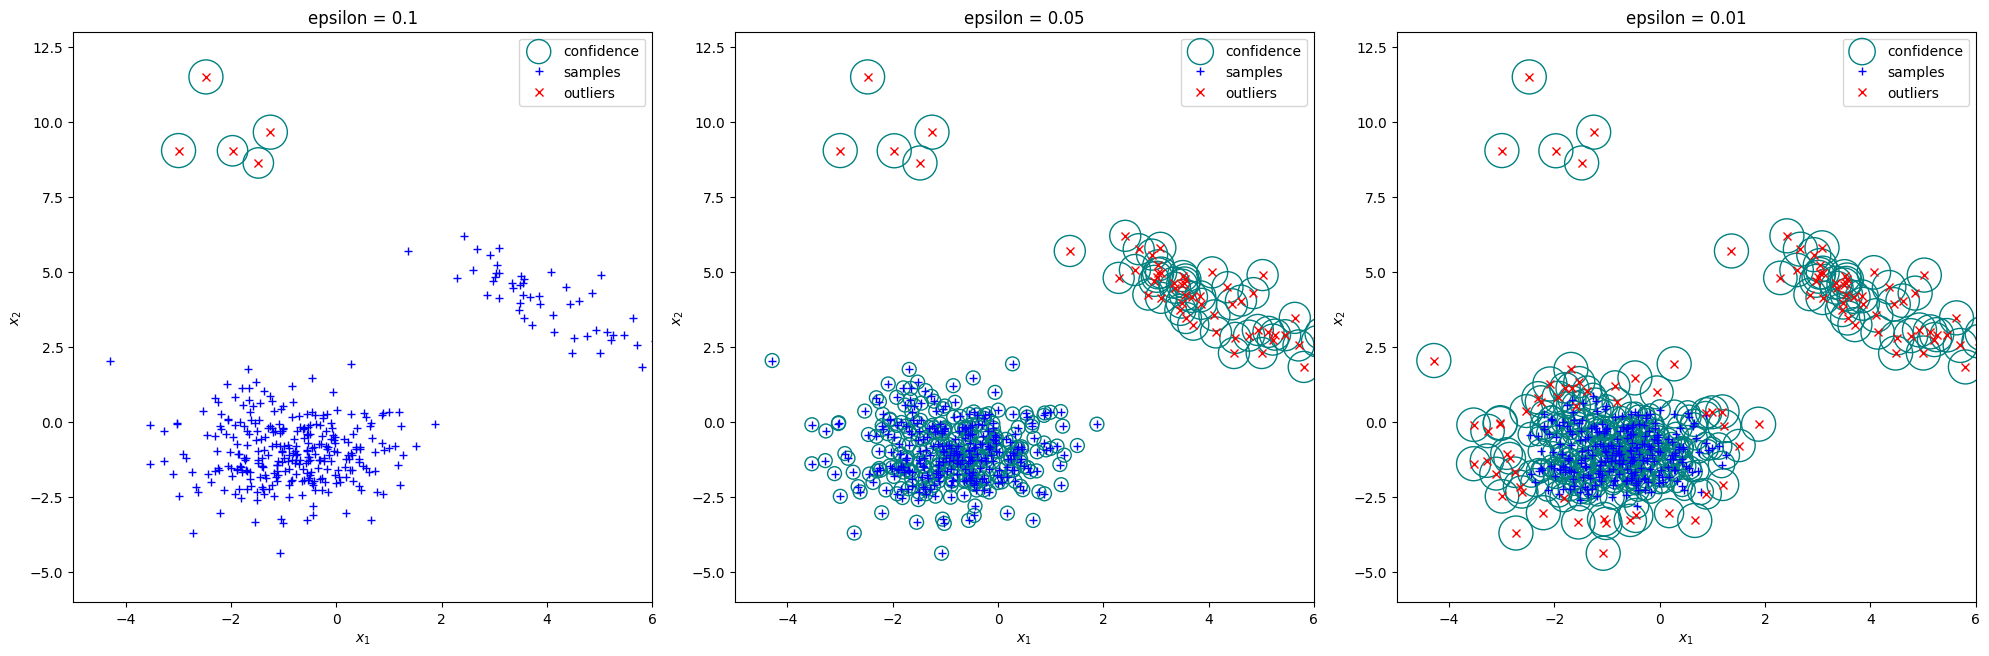

In [7]:
eps = [0.1, 0.05, 0.01]
# Initialize a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6.666))
normal = False

for i, e in enumerate(eps):
    model = SlicedWassersteinFilter(eps=e, n=30, n_projections=50, p=0.6, n_jobs=-1, swtype='original') if normal else SmartSplitSlicedWassersteinFilter(eps=e, n=60, n_projections=100, p=0.7, n_jobs=-1, swtype='original', n_splits = 2, n_clusters = 2)
    preds, vote = model.fit_predict(dataset)
    print(preds.shape)
    print(vote.shape)
    mask = preds == 1
    filtered_dataset = dataset[mask]
    outliers = dataset[~mask]
    radius = (1 - (1-vote)) / (1 - 0)

    # Select the current subplot
    ax = axes[i]
    print(dataset.shape)
    scatter = ax.scatter(
        dataset[:, 0],
        dataset[:, 1],
        s=(600 * radius),
        edgecolors="teal",
        facecolors="none",
        label="confidence",
    )
    ax.plot(filtered_dataset[:, 0], filtered_dataset[:, 1], '+b', label='samples')
    ax.plot(outliers[:, 0], outliers[:, 1], 'xr', label='outliers')
    ax.set_xlim((-5, 6))
    ax.set_ylim((-6, 13))
    ax.set_title(f'epsilon = {e}')
    ax.legend()
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')

# Display the figure with subplots
plt.tight_layout()
plt.savefig('2D_tutorial.pdf', dpi=400)
plt.show()

As we see, we're able to generate three filtering scenarios by modifying the value of epsilon. 

In the left subfigure, we filter only the statistical outliers.

In the middle subfigure, we only keep the group of the majority.

In the right subfigure, we only keep the samples from the majority which are close to its barycenter.

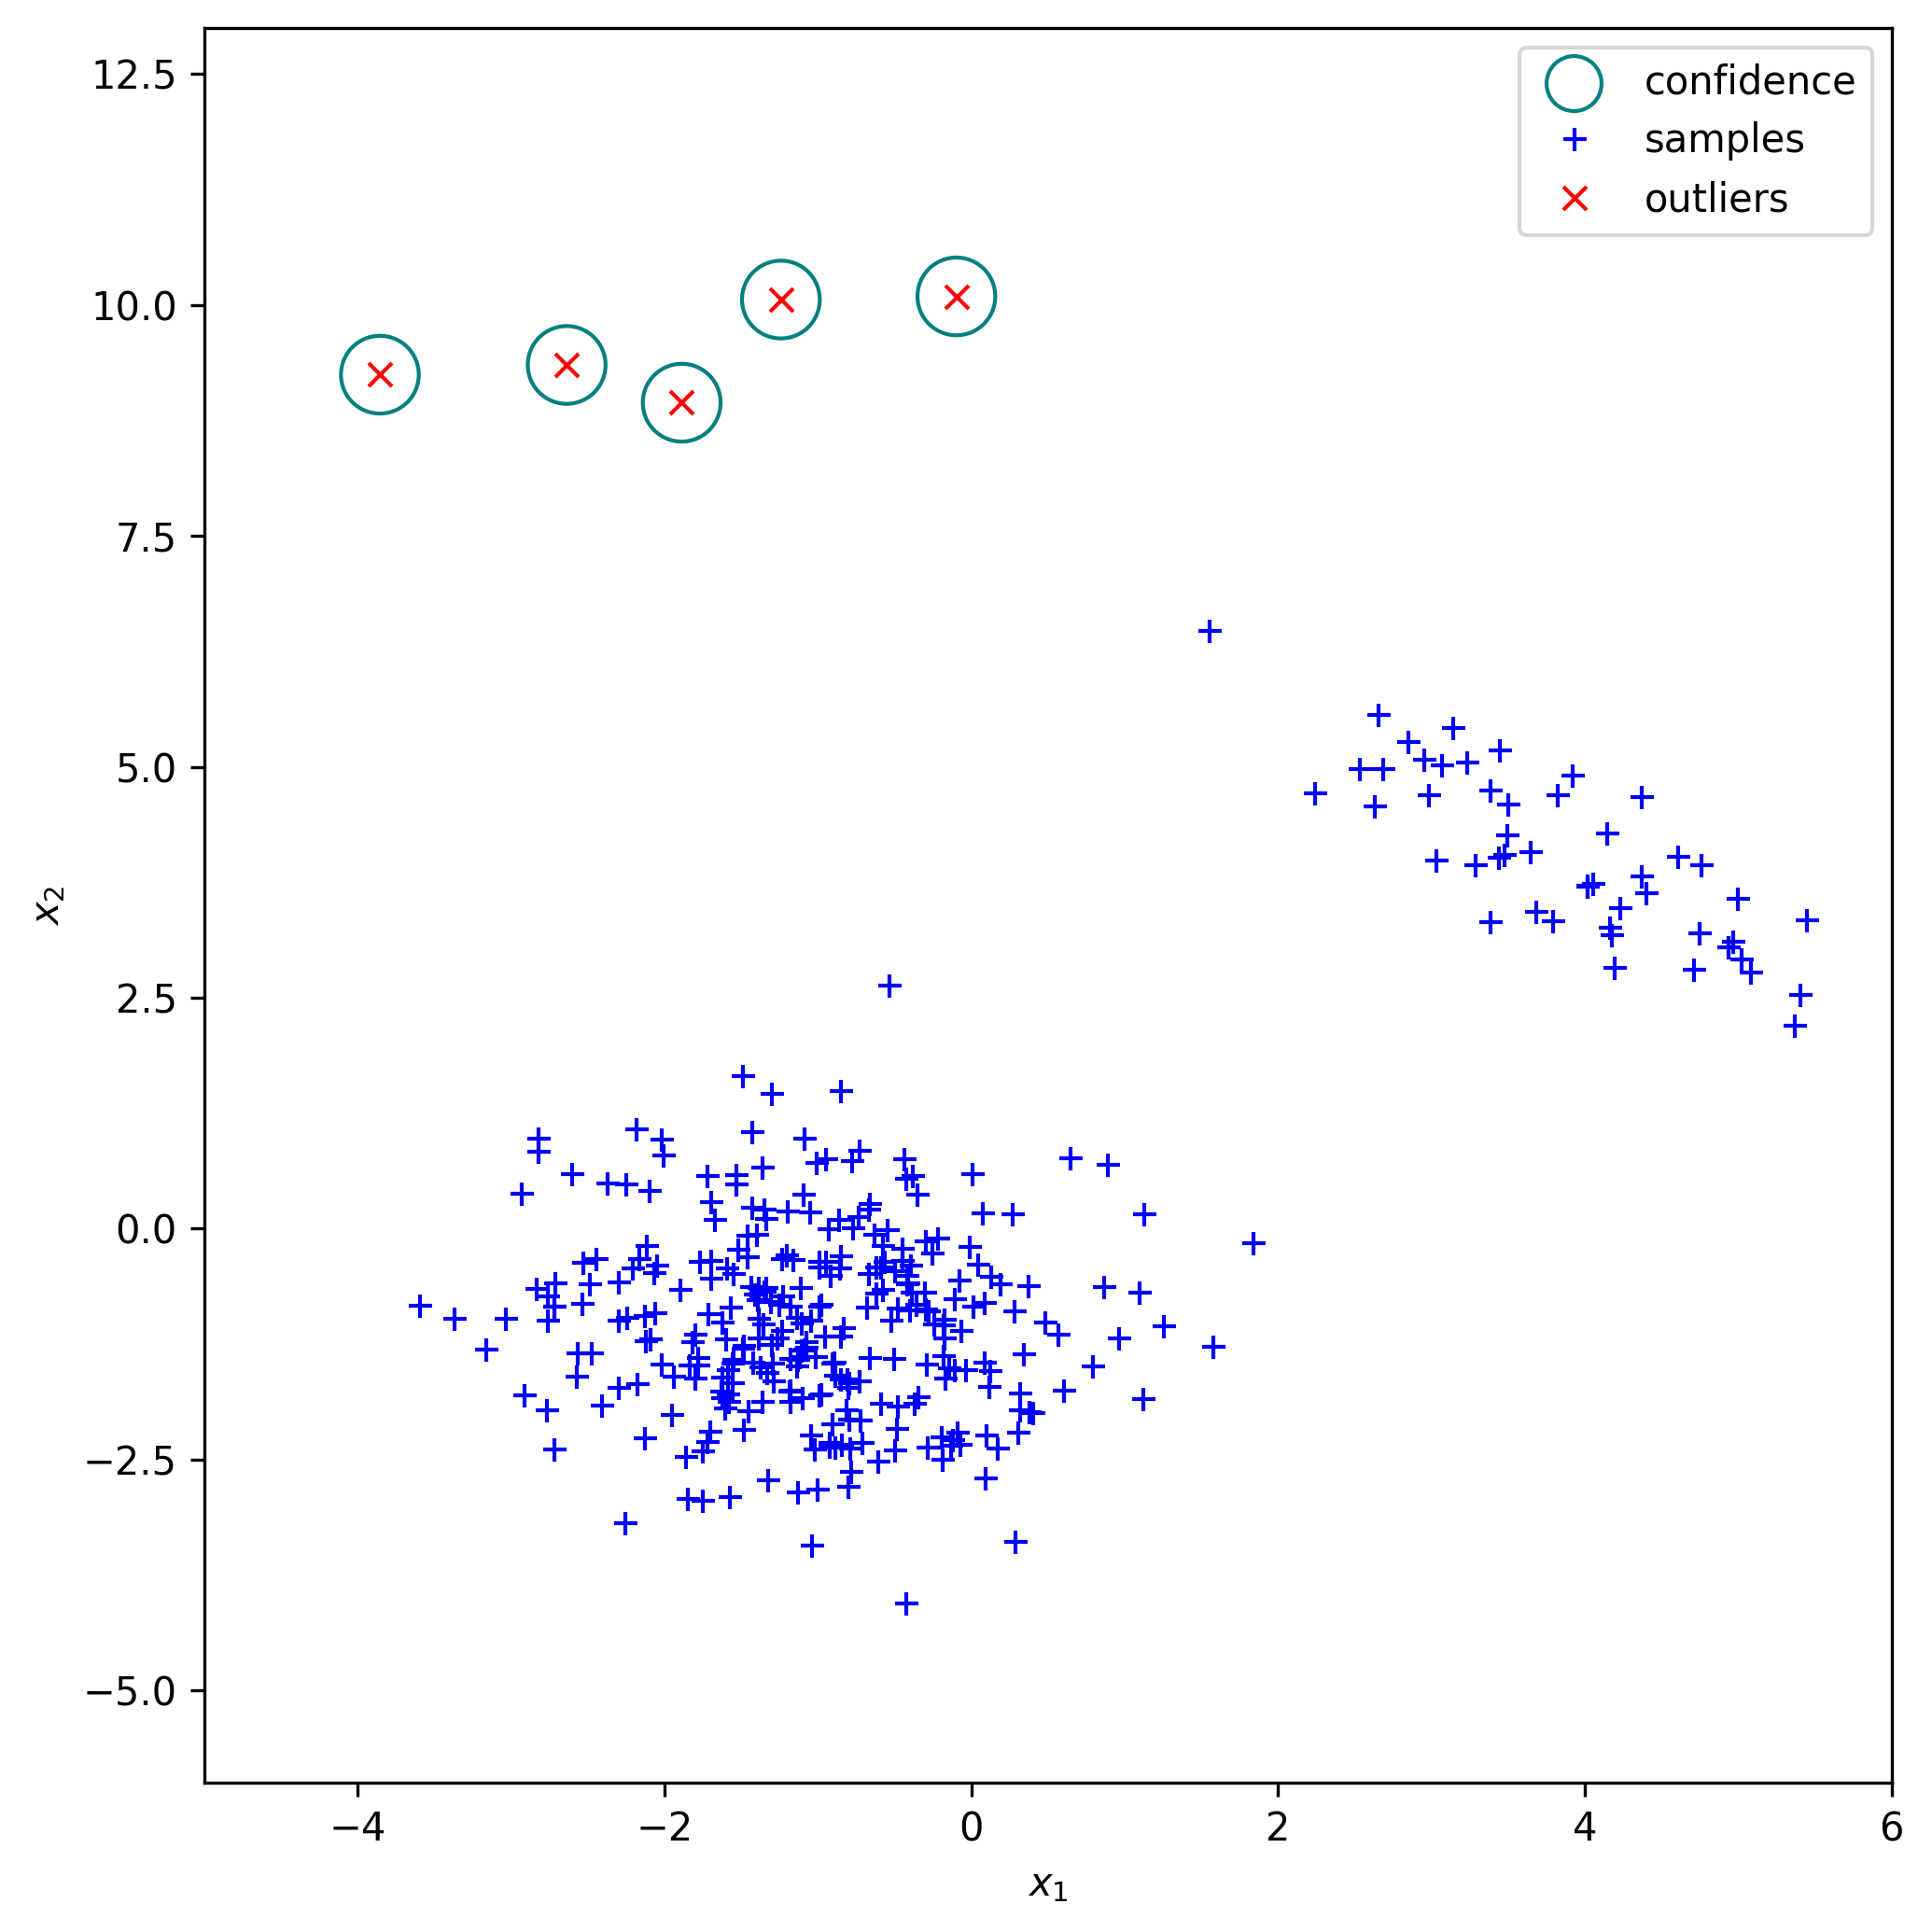

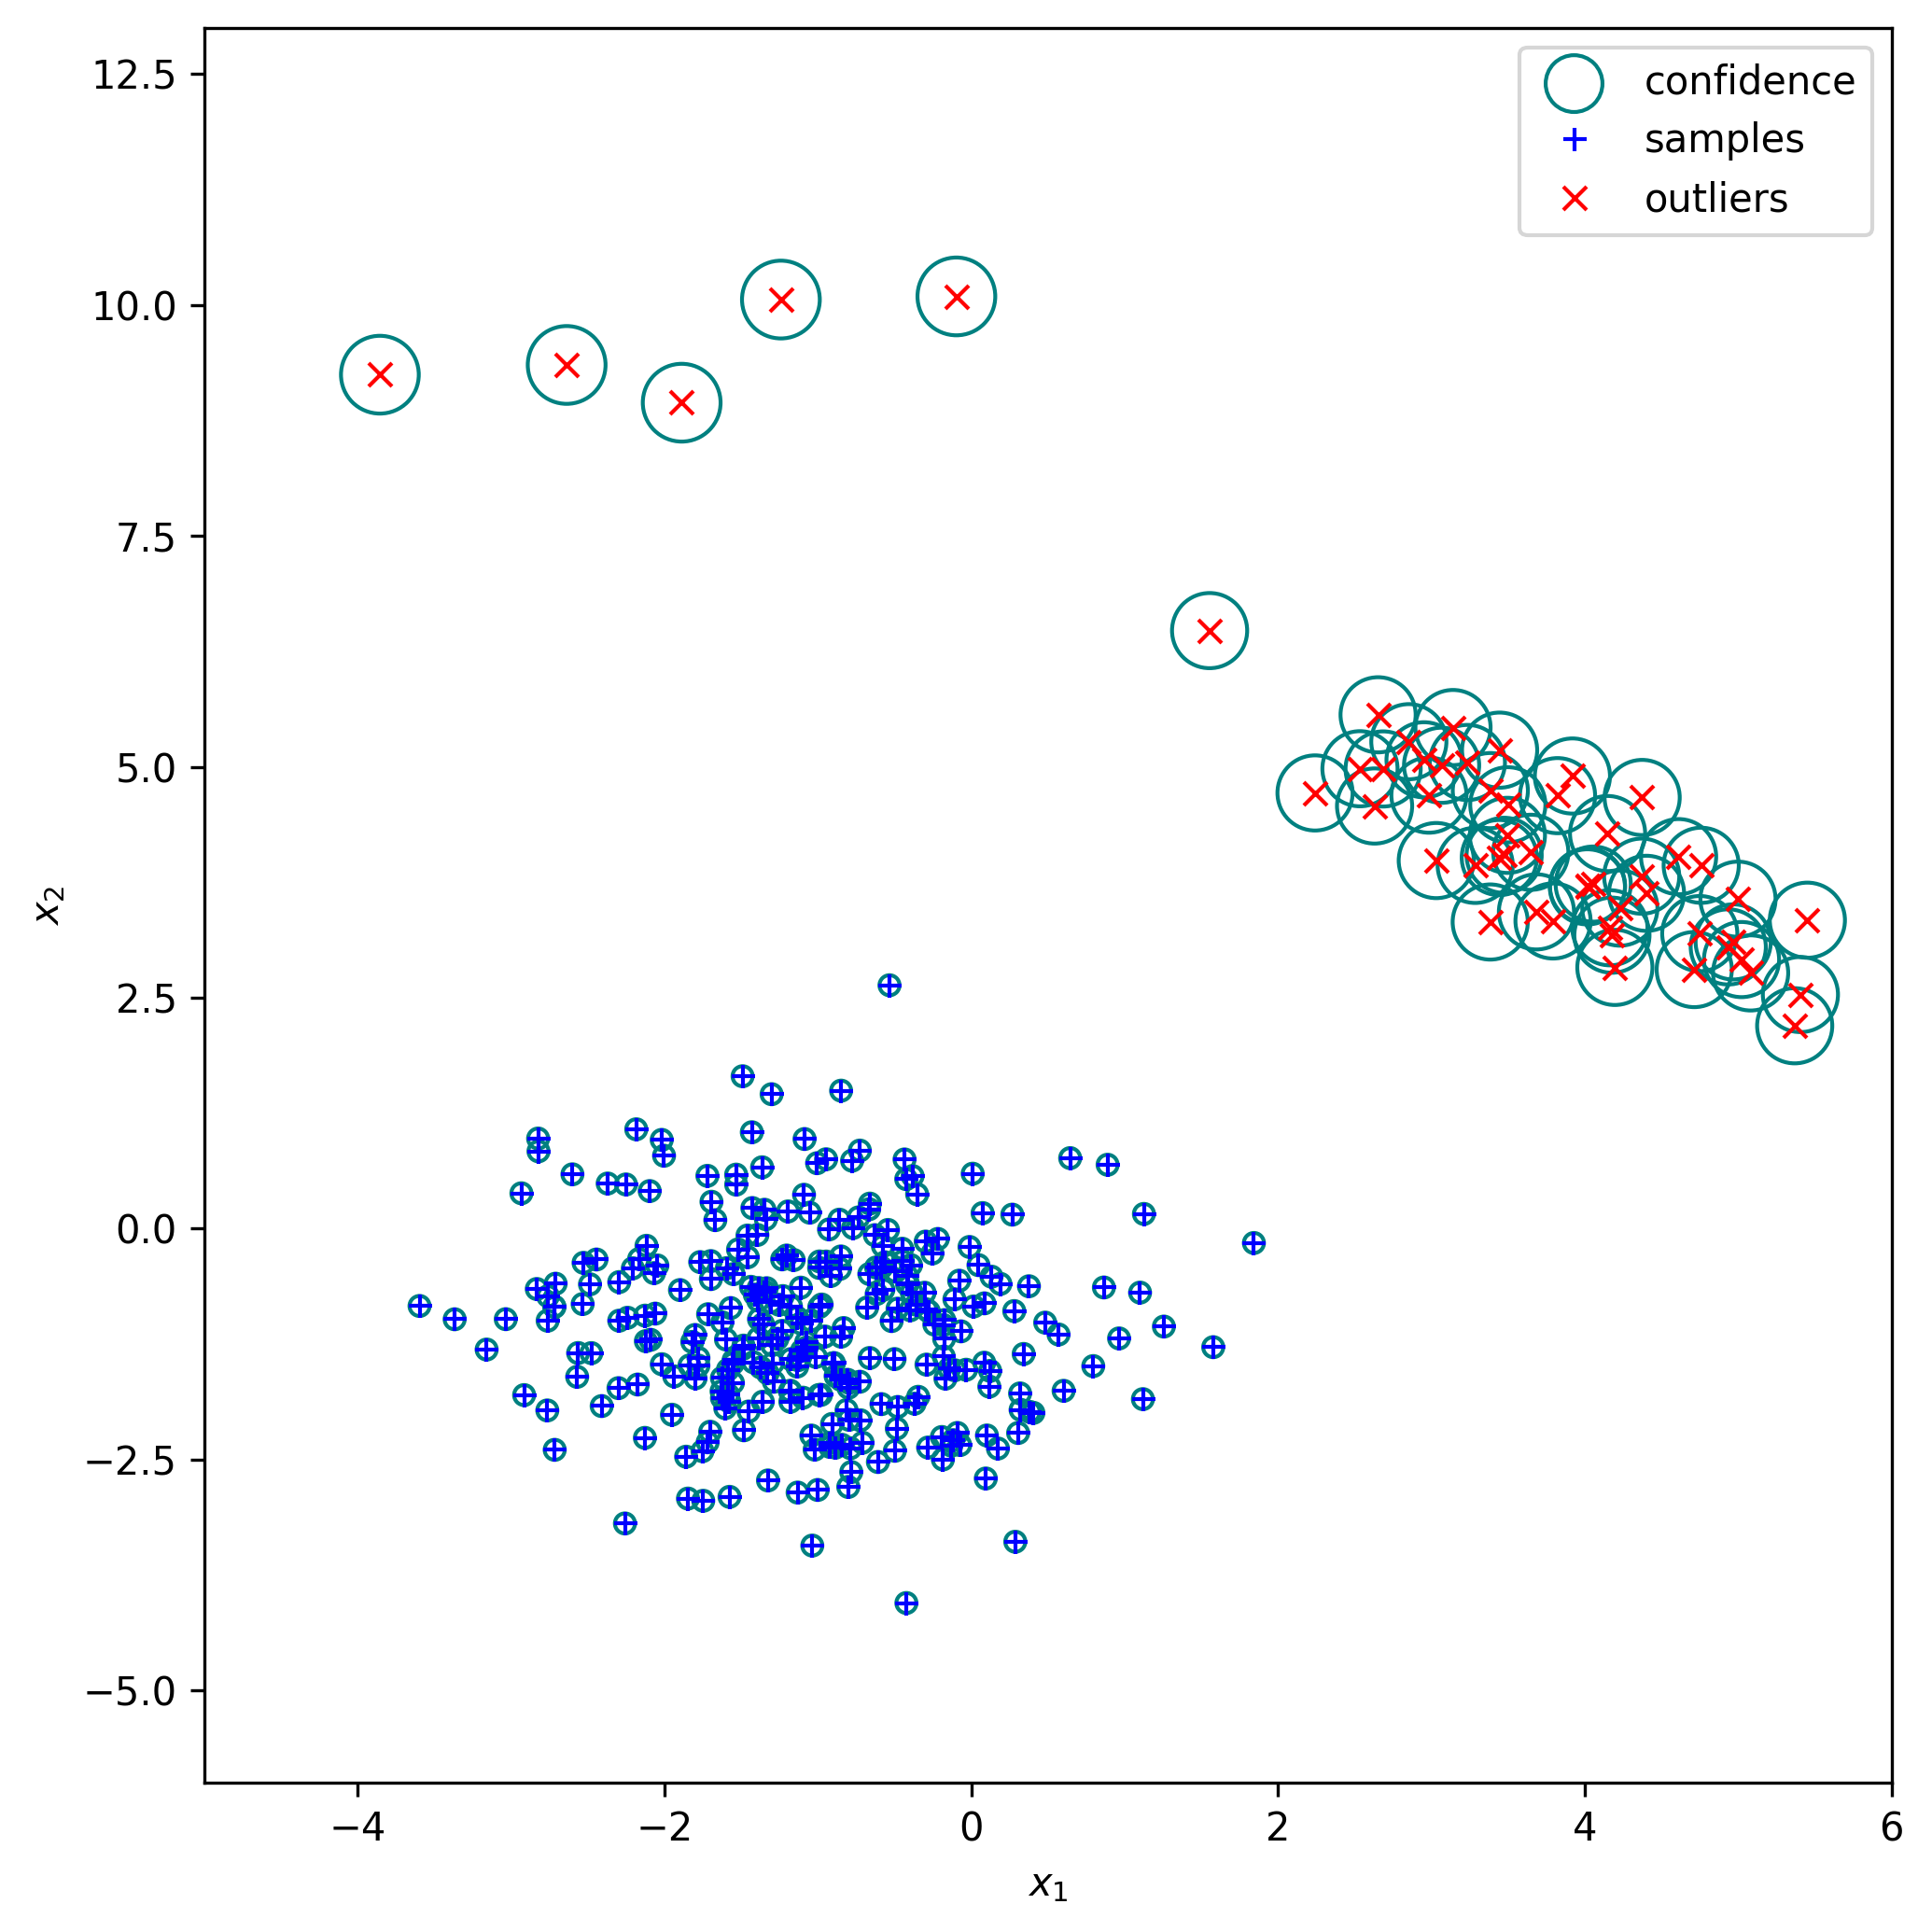

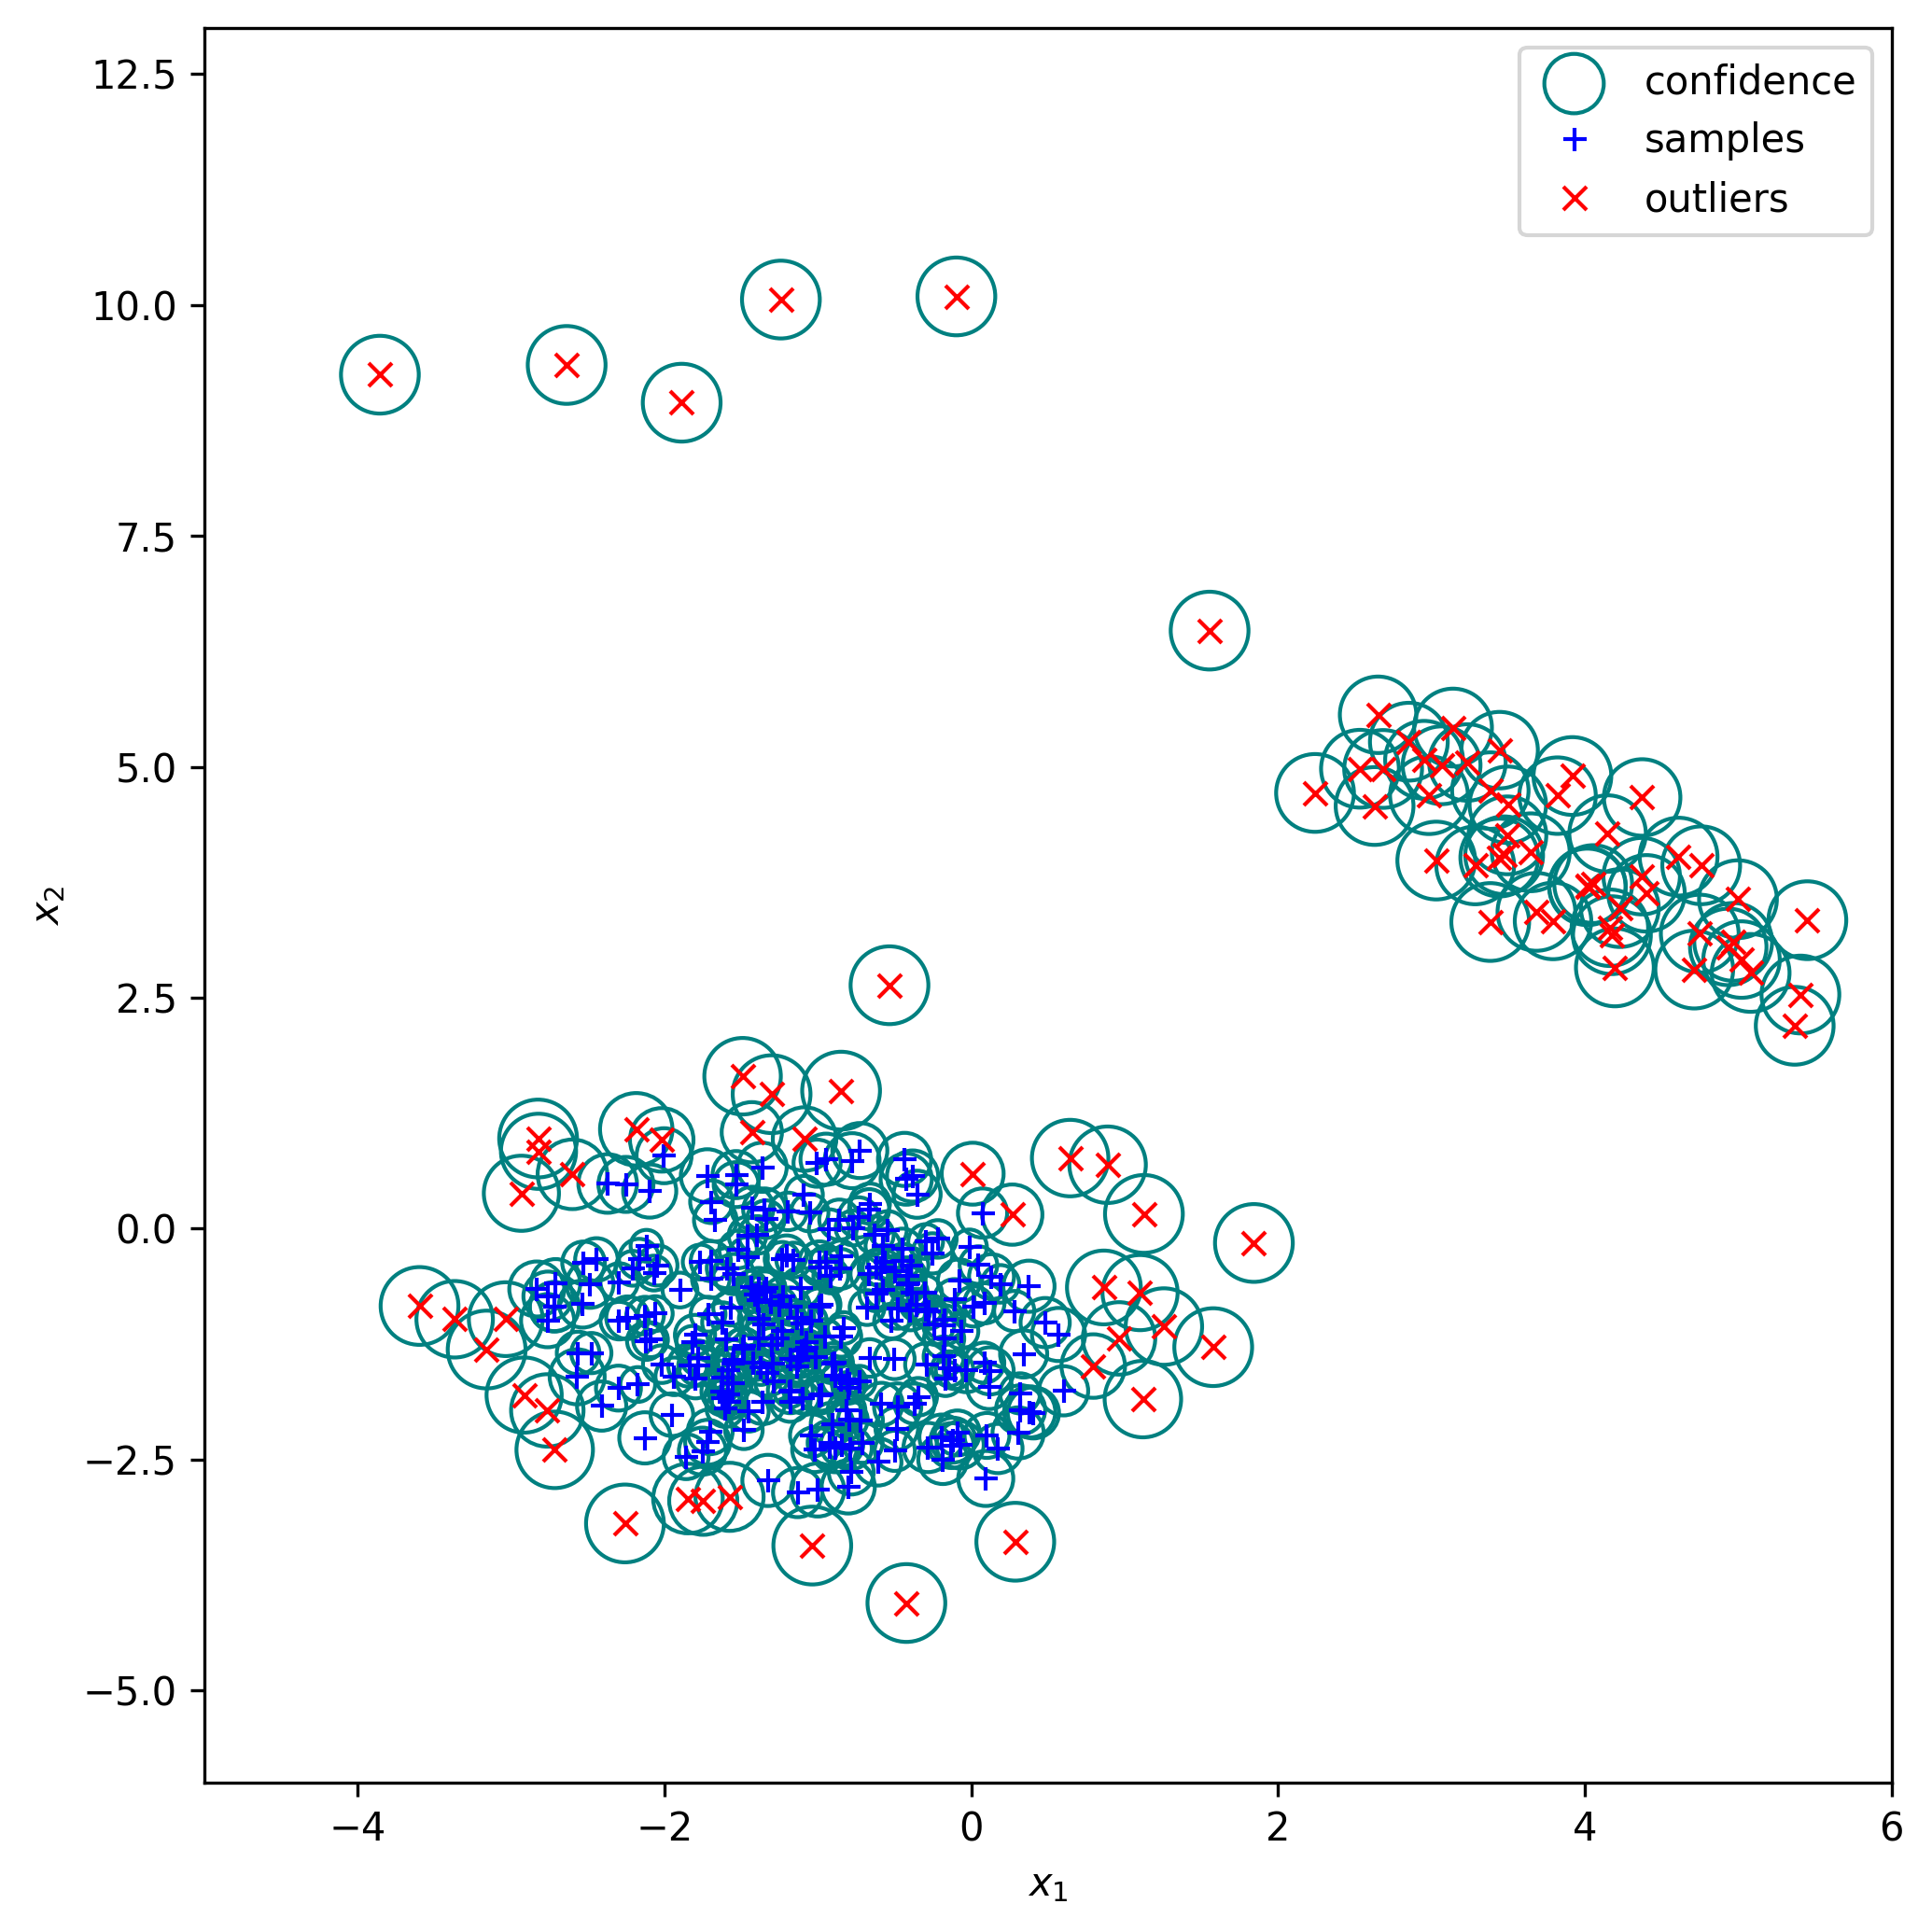

In [11]:
eps = [0.1, 0.05, 0.01]
# Initialize a figure with 3 subplots (1 row, 3 columns)


for i, e in enumerate(eps):
    model = SlicedWassersteinFilter(eps=e, n=30, n_projections=50, p=0.6, n_jobs=-1, swtype='original')
    preds, vote = model.fit_predict(dataset)

    mask = preds == 1
    filtered_dataset = dataset[mask]
    outliers = dataset[~mask]
    radius = (1 - (1-vote)) / (1 - 0)

    # Select the current subplot
    plt.figure(figsize=(7, 7), dpi=300)
    scatter = plt.scatter(
        dataset[:, 0],
        dataset[:, 1],
        s=400 * radius,
        edgecolors="teal",
        facecolors="none",
        label="confidence",
    )
    plt.plot(filtered_dataset[:, 0], filtered_dataset[:, 1], '+b', label='samples')
    plt.plot(outliers[:, 0], outliers[:, 1], 'xr', label='outliers')
    plt.xlim((-5, 6))
    plt.ylim((-6, 13))
    #plt.title(f'epsilon = {e}')
    plt.legend()
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    # Display the figure with subplots
    plt.tight_layout()
    plt.savefig(f'2D_tutorial_eps_{e}.pdf', dpi=600)
    plt.show()